Import Library yang dibutuhkan
1. Numpy digunakan untuk operasi perhitungan dan penggunaan array
2. statsmodels.api digunakan untuk uji statistik
3. pyplot digunakan untuk memvisualisasikan data
4. plot_acf dan plot_pacf digunakan dalam perhitungan untuk mencari ACF dan PACF serta membantu dalam memvisualisasikan grafik ACF dan PACF
5. ARMA digunakan untuk melakukan identifikasi pemodelan ARMA
6. warnings & ConvergenceWarning digunakan untuk mengantisipasi warning dari library

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Data atau Read Data

Disini kami melakukan load data terlebih dahulu yaitu data biaya pengiriman atau Shipping cost yang mengurut berdasarkan orderdate, dimana data tersebut berisi data-data biaya pengiriman dari bulan Januari 2014-Februari awal 2014

In [ ]:
df = pd.read_excel("data_biayapengiriman(6).xlsx")
df

,Order Date,Shipping Cost ($)
0,2014-01-01,92.56
1,2014-01-01,103.20
2,2014-01-01,104.69
3,2014-01-01,107.44
4,2014-01-01,112.75
...,...,...
995,2014-02-05,249.72
996,2014-02-05,179.01
997,2014-02-05,223.78
998,2014-02-05,224.25


# Cek missing value

Untuk memastikan data memiliki missing value atau tidak, kami mencoba melakukan cek missing value

In [ ]:
df.isnull().sum()

Order Date           0
Shipping Cost ($)    0
dtype: int64

# Cek Type Data

Disini, kami melakukan cek type data yang ada pada data biaya pengiriman tersebut

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         1000 non-null   datetime64[ns]
 1   Shipping Cost ($)  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


# Plot Data
Data deret waktu biaya pengiriman, mempunyai data dalam rentang waktu 36 hari yaiu pada dimulai pada tanggal 01-01-2014 sampai dengan 05-02-2014 yaitu dari bulan Januari sampai Februari awal. Setiap hari nya terdapat banyak data biaya pengiriman sesuai dengan tanggal order.

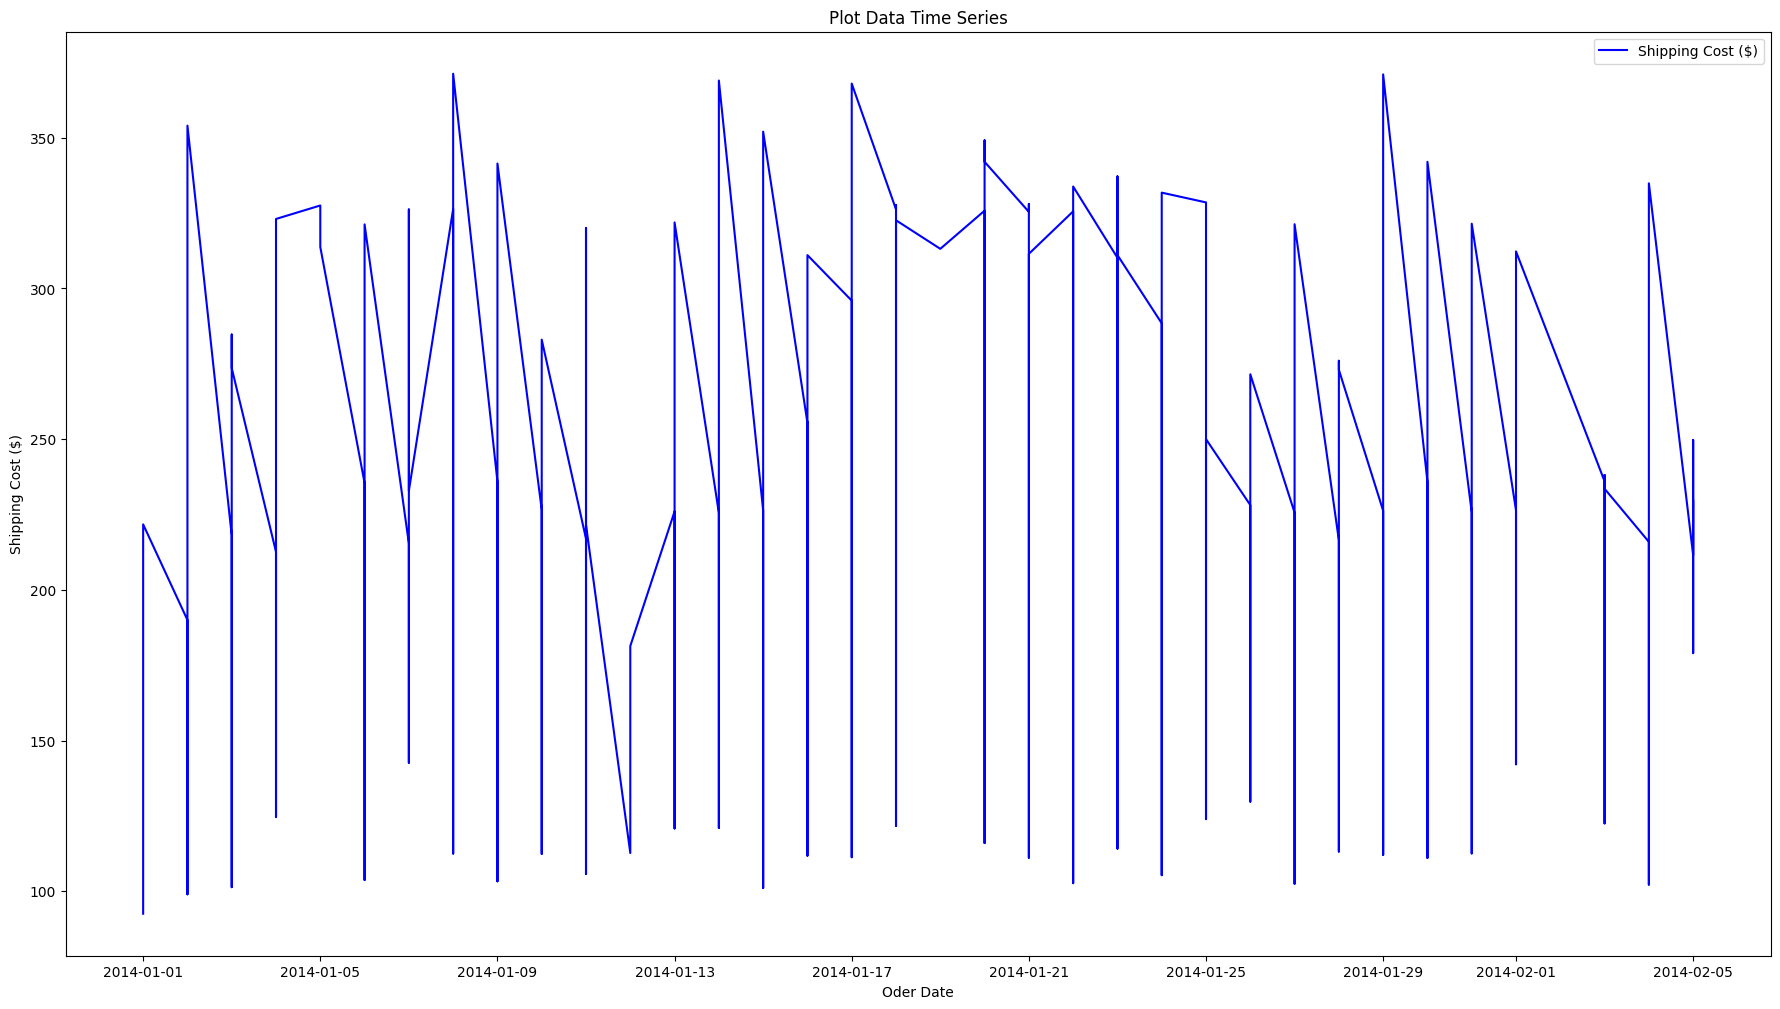

In [ ]:
# Ubah kolom waktu ke dalam format datetime jika belum
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Atur ukuran gambar (figsize)
plt.figure(figsize=(22, 12))

# Plot data time series
plt.plot(df['Order Date'], df['Shipping Cost ($)'], label='Shipping Cost ($)', color='blue')

# Tambahkan label dan judul
plt.xlabel('Oder Date')
plt.ylabel('Shipping Cost ($)')
plt.title('Plot Data Time Series')

# Tampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

# Persiapan Data untuk Uji Stasioner


Sebelum melakukan pengujian stasioner pada data, disini kami membuat variabel baru bernama **“Kolom”**, dimana variabel ini akan menyimpan data “Shipping Cost” pada dataframe. Setelah itu, kami membuat variable **“time_series”** yang berisi data dari variabel **“Kolom”** yang sudah berbentuk dataframe. Variabel **“result”** disini berisi pengujian menggunakan uji Dickey-Fuller dengan fungsi “**adfuller”**. Hasil uji Dickey-Fuller akan disimpan dalam beberapa variabel seperti **“adf_statictic”, “p_value”, n_lags”, dan “critical_values”**


In [ ]:
Kolom ='Shipping Cost ($)'
time_series = df[Kolom]
result = sm.tsa.adfuller(time_series, autolag='AIC')
adf_statistic, p_value, n_lags, critical_values = result[0], result[1], result[2], result[4]

# Uji Stasioner Data dengan ADF

Uji ADF dilakukan untuk melihat apakah data yang kita miliki termasuk data yang sudah stasioner ataukah belum, disini kita menggunakan nilai 0.05 sebagai nilai batas atau taraf signifikan untuk menentukan kestasioneran data. Jika nilai p_value dari data kurang dari 0.05 maka data tidak memiliki akar unit dan dapat dikatakan bahwa data stasioner stasioner, sebaliknya jika nilai p_value dari data sama dengan atau bahkan lebih dari 0.05 maka data memiliki akar unit dan dapat dikatakan bahwa data tidak stasioner.

ADF Statistic: -8.103639428006943
p-value: 1.2800020576619874e-12
Optimal Number of Lags: 16
Critical Values:
   1%: -3.4370198458812156
   5%: -2.864484708707697
   10%: -2.568337912084273
P-Value (1.2800020576619874e-12) < 0.05: Data tidak memiliki akar unit, stasioner.


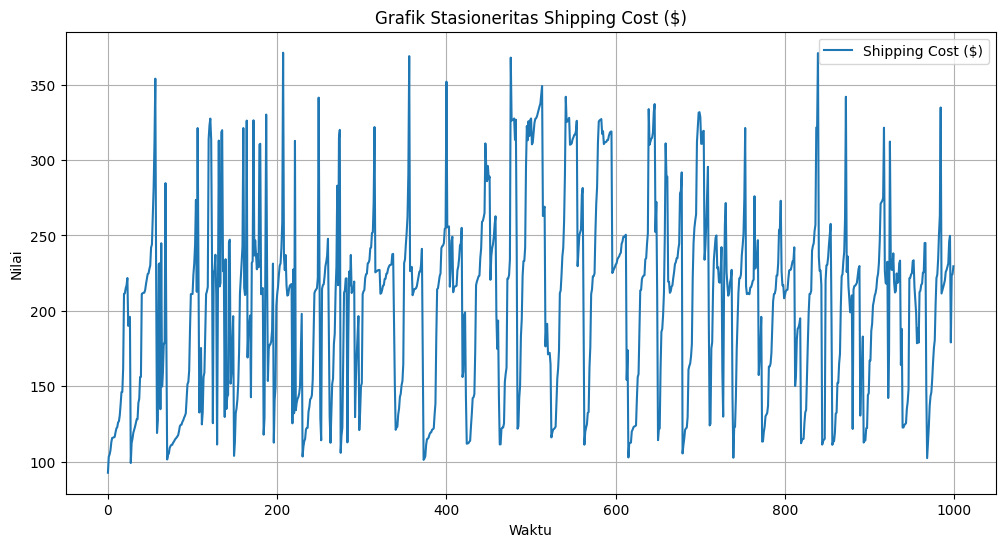

In [ ]:
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Optimal Number of Lags: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpretasi hasil uji
if p_value < 0.05:
    print(f'P-Value ({p_value}) < 0.05: Data tidak memiliki akar unit, stasioner.')
else:
    print(f'P-Value ({p_value}) >= 0.05: Data memiliki akar unit, tidak stasioner.')

plt.figure(figsize=(12, 6))
plt.plot(time_series, label=Kolom)
plt.title(f'Grafik Stasioneritas {Kolom}')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Karena data sudah stasioner, artinya data tidak perlu dilakukan differencing lagi

# Plot ACF dan PACF
Ketika data sudah dikatakan stasioner, maka selanjutnya kita akan membuat plot ACF dan PACF, hal ini dilakukan untuk mengetahui lag mana saja yang memotong garis batas, kita perlu mengetahui lag mana yang memotong garis batas untuk dapat menghitung dan menentukan nilai AIC terbaik yaitu dengan mengambil nilai AIC yang terkecil

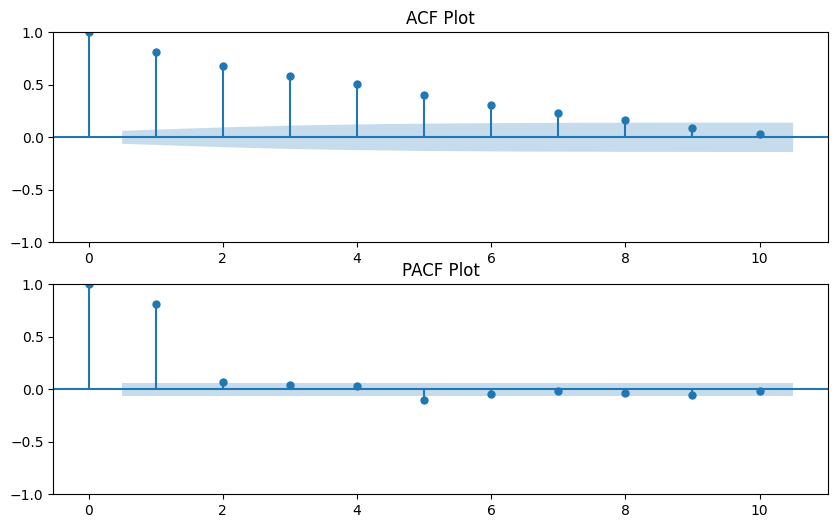

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotting ACF Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(time_series, lags=10, ax=ax1)
plot_pacf(time_series, lags=10, ax=ax2)

ax1.set_title('ACF Plot')
ax2.set_title('PACF Plot')

plt.show()

# Identifkasi Model ARMA dan Hitung Nilai AIC
Dalam mengidentifikasi model ARMA hal pertama yang harus dilakukan adalah mencari nilai AIC terendah atau terkecil, nilai AIC digunakan sebagai kriteria pemilihan model dimana nilai AIC yang lebih rendah menunjukkan model yg lebih baik. nilai AIC didapat dengan cara mencari kombinasi dari orde (p,q) dengan PACF sebagai orde p dan ACF sebagai orde q. kombinasi ini dapat dilihat dari grafik plot ACF dan PACF, dimana pada pada plot ACF menunjukkan bahwa autokorelasi signifikan pada lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7, dan lag 8. Sementara untuk plot PACF menunjukkan bahwa autokorelasi parsial signifikan pada lag 1, lag 2, lag 3, lag 5, lag 6, lag 8, dan lag 9. Selanjutnya dapat dihitung nilai AIC untuk setiap kombinasi model.

# Rumus AIC:
# AIC=2𝑘−2ln(𝐿̂ )


In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

aic_values = []
for p in range(0, 3):
    for q in range(0, 9):
        model_arma = sm.tsa.ARIMA(time_series, order=(p,0,q))
        results = model_arma.fit()
        aic = results.aic
        aic_values.append((p, q, aic))

for p, q, aic in aic_values:
    print(f"ARMA({p},{q}) - AIC: {aic}")

ARMA(0,0) - AIC: 11111.234972087526
ARMA(0,1) - AIC: 10517.932830364934
ARMA(0,2) - AIC: 10264.909829023823
ARMA(0,3) - AIC: 10198.068639066123
ARMA(0,4) - AIC: 10127.298538565852
ARMA(0,5) - AIC: 10088.459622102426
ARMA(0,6) - AIC: 10071.79887464966
ARMA(0,7) - AIC: 10062.040432660655
ARMA(0,8) - AIC: 10043.116338632943
ARMA(1,0) - AIC: 10039.710493089
ARMA(1,1) - AIC: 10036.909396546547
ARMA(1,2) - AIC: 10037.871689293363
ARMA(1,3) - AIC: 10039.869279681865
ARMA(1,4) - AIC: 10030.74856214213
ARMA(1,5) - AIC: 10031.771888681478
ARMA(1,6) - AIC: 10033.022546933853
ARMA(1,7) - AIC: 10032.932886543638
ARMA(1,8) - AIC: 10031.537746885053
ARMA(2,0) - AIC: 10037.369054905532
ARMA(2,1) - AIC: 10038.249832918365
ARMA(2,2) - AIC: 10039.484009430213
ARMA(2,3) - AIC: 10032.607260046554
ARMA(2,4) - AIC: 10029.377692395621
ARMA(2,5) - AIC: 10031.131849145044
ARMA(2,6) - AIC: 10032.794253755614
ARMA(2,7) - AIC: 10032.869022959421
ARMA(2,8) - AIC: 10032.559096102586


In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

aic_values = []
p = 5

for q in range(0, 9):
    model_arma = sm.tsa.ARIMA(time_series, order=(p, 0, q))
    results = model_arma.fit()
    aic = results.aic
    aic_values.append((p, q, aic))
    print(f"ARMA({p},{q}) - AIC: {aic}")

ARMA(5,0) - AIC: 10031.022685911577
ARMA(5,1) - AIC: 10029.001656291115
ARMA(5,2) - AIC: 10030.165082347352
ARMA(5,3) - AIC: 10029.066099243157
ARMA(5,4) - AIC: 10027.990783806417
ARMA(5,5) - AIC: 10027.88844240607
ARMA(5,6) - AIC: 10030.429375551214
ARMA(5,7) - AIC: 10027.877474773311
ARMA(5,8) - AIC: 10029.112200858228


# ARMA MODEL TERPILIH
ARMA model yang terpilih yaitu (5,7) selanjutnya dibangun model untuk ARMA (5,7) atau ARIMA (5,0,7) dengan nilai AIC terkecil dari kombinasi model yang lain yaitu ARMA(5,7) - AIC: 10027.877474773311, dan ditampilkan summary dari model tesebut

In [ ]:
model = sm.tsa.arima.ARIMA(time_series, order=(5,0,7))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Shipping Cost ($)   No. Observations:                 1000
Model:                 ARIMA(5, 0, 7)   Log Likelihood               -4999.939
Date:                Sat, 11 Nov 2023   AIC                          10027.877
Time:                        06:57:44   BIC                          10096.586
Sample:                             0   HQIC                         10053.992
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.5697      5.613     36.803      0.000     195.569     217.571
ar.L1          1.0366      0.202      5.127      0.000       0.640       1.433
ar.L2         -0.2939      0.352     -0.834      0.404      -0.985       0.397
ar.L3          0.0134      0.364      0.037      0.971      -0.700       0.726
ar.L4          0.8395      0.317      2.649      0.008       0.218       1.461
ar.L5         -0.6911      0.143     -4.844      0.000      -0.971      -0.411
ma.L1         -0.2858      0.207     -1.382      0.167      -0.691       0.120
ma.L2          0.1329      0.222      0.599      0.549      -0.302       0.568
ma.L3          0.0871      0.231      0.376      0.707      -0.367       0.541
ma.L4         -0.7007      0.188     -3.735      0.000      -1.068      -0.333
ma.L5          0.0755      0.054      1.398      0.162      -0.030       0.181
ma.L6          0.0585      0.042      1.385      0.166      -0.024       0.141
ma.L7          0.0479      0.045      1.075      0.282      -0.039       0.135
sigma2      1295.7173     41.281     31.388      0.000    1214.809    1376.626
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               675.55
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# VISUALISASI

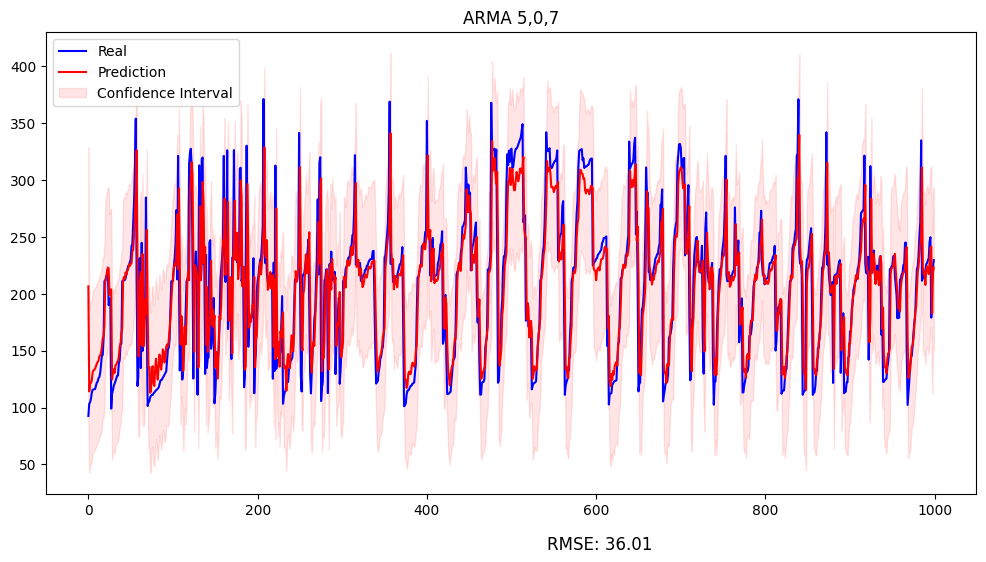

In [ ]:
pred = model_fit.get_prediction(dynamic=False)

pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()


actual = time_series
rmse = np.sqrt(np.mean((actual - pred_mean) ** 2))

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Real', color='b')
plt.plot(pred_mean, label='Prediction', color='red')

# upper and lower confidence intervals
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='red', alpha=0.1, label='Confidence Interval')

plt.annotate(f'RMSE: {rmse:.2f}', (0.5, 0.02), xycoords='figure fraction', fontsize=12, ha='center')
plt.title("ARMA 5,0,7")
plt.legend()

# Kesimpulan

Analisis dari model ARMA (5,7) atau ARIMA (5,0,7) yang merupakan model terpilih dengan nilai AIC terkecil yaitu AIC: 10027.877474773311, didapatkan bahwa hasil untuk prediksi data deret waktu biaya pengiriman dengan model tersebut mendapatkan nilai RMSE: 36.01.

Pada Gambar visualisasi diatas garis berwarna merah merupakan hasil prediksi tingkat biaya pengiriman yang diperoleh menggunakan model ARMA(5,7) atau ARIMA (5,0,7). Visualisasi tersebut menunjukkan hasil prediksi biaya pengiriman mengikuti pola yang sama dengan data aktual, yang menunjukkan bahwa model ini cocok digunakan dan sesuai dengan data yang sebenarnya. Adapun dengan menggunakan model ARMA(5,7) diddaptkan RMSE sebesar 36.01 menunjukan bahwa hasil peramalan mendekati nilai cukup aktual.